### Load track, stations & schedule into new Line instance

In [1]:
import json
import pandas as pd
from App.classes.Schedule import Schedule
from App.classes.Line import Line

todayStr = '10/22/18'
today = pd.to_datetime(todayStr)
track = json.load(open('shapefiles/gold_northbound/goldJSON.json'))
stations = json.load(open('misc/GoldLineStationIds.json'))['items']
full_schedule = pd.read_csv('GTFS/stop_times.txt')
trips = pd.read_csv('GTFS/trips.txt')
calendar = pd.read_csv('GTFS/calendar.txt')
"DONE"

'DONE'

In [2]:
calendar.head()

service_id  monday  tuesday  wednesday  thursday  friday  \
0  RINFRA-801-2_Saturday-90       0        0          0         0       0   
1    RINFRA-801-3_Sunday-13       0        0          0         0       0   
2   RINFRA-801-1_Weekday-32       1        1          1         1       1   
3   RINFRA-801-1_Weekday-30       1        1          1         1       1   
4   RINFRA-801-1_Weekday-91       1        1          1         1       1   

   saturday  sunday  start_date  end_date  
0         1       0    20181020  20181103  
1         0       1    20181021  20181021  
2         0       0    20181022  20181023  
3         0       0    20181024  20181025  
4         0       0    20181026  20181102

In [3]:
calendar.start_date = calendar.start_date.apply(lambda row: str(row)[4:6] + '/' + str(row)[6:8] + '/' + str(row)[0:4])
calendar.end_date = calendar.end_date.apply(lambda row: str(row)[4:6] + '/' + str(row)[6:8] + '/' + str(row)[0:4])
calendar.start_date = pd.to_datetime(calendar['start_date'])
calendar.end_date = pd.to_datetime(calendar['end_date'])
"DONE"

'DONE'

In [4]:
mask = (calendar['end_date'] >= today)
calendar = calendar[mask]
mask = (calendar['start_date'] <= today)
calendar = calendar[mask]

In [5]:
cal = list(calendar.service_id)
cal

['RINFRA-801-2_Saturday-90',
 'RINFRA-801-1_Weekday-32',
 'RINFRA-804-1_Weekday-31',
 'RINFRA-803-1_Weekday-44',
 'RINFRA-802-1_Weekday-13']

In [6]:
trips.head()

route_id               service_id   trip_id  trip_headsign  direction_id  \
0       806  RINFRA-801-1_Weekday-30  47114506            NaN             1   
1       801  RINFRA-801-1_Weekday-30  47114507            NaN             0   
2       801  RINFRA-801-1_Weekday-30  47114508            NaN             0   
3       806  RINFRA-801-1_Weekday-30  47114509            NaN             1   
4       806  RINFRA-801-1_Weekday-30  47114510            NaN             1   

   block_id      shape_id  
0       669  806SB_160306  
1       102  801NB_120323  
2       110  801NB_120323  
3       668  806SB_160306  
4       672  806SB_160306

In [7]:
trips.loc[:, 'today'] = trips.service_id.apply(lambda service: service in cal)
trips = trips[trips.today == True]
trips.head()
trips_running_today = list(trips.trip_id)

In [8]:
full_schedule.head()

trip_id arrival_time departure_time  stop_id  stop_sequence  \
0  47114506     25:33:00       25:33:00    80122              1   
1  47114506     25:36:00       25:36:00    80121              2   
2  47114506     25:40:00       25:40:00    80123              3   
3  47114506     25:42:00       25:42:00    80124              4   
4  47114506     25:44:00       25:44:00    80125              5   

                stop_headsign  pickup_type  drop_off_type  
0  806 - Expo / Bundy Station            0              0  
1  806 - Expo / Bundy Station            0              0  
2  806 - Expo / Bundy Station            0              0  
3  806 - Expo / Bundy Station            0              0  
4  806 - Expo / Bundy Station            0              0

In [9]:
full_schedule.loc[:, 'today'] = full_schedule.trip_id.apply(lambda trip: trip in trips_running_today)
full_schedule = full_schedule[full_schedule.today == True]
full_schedule.head()

trip_id arrival_time departure_time  stop_id  stop_sequence  \
10308  47223810     25:33:00       25:33:00    80122              1   
10309  47223810     25:36:00       25:36:00    80121              2   
10310  47223810     25:40:00       25:40:00    80123              3   
10311  47223810     25:42:00       25:42:00    80124              4   
10312  47223810     25:44:00       25:44:00    80125              5   

                    stop_headsign  pickup_type  drop_off_type  today  
10308  806 - Expo / Bundy Station            0              0   True  
10309  806 - Expo / Bundy Station            0              0   True  
10310  806 - Expo / Bundy Station            0              0   True  
10311  806 - Expo / Bundy Station            0              0   True  
10312  806 - Expo / Bundy Station            0              0   True

In [10]:
gold_schedule = Schedule(todayStr, '804', full_schedule)

gold_line = Line(804, track, stations, gold_schedule)
"DONE"

/home/cts/repos/hackforla/metro/analysis/App/classes/Schedule.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  schedule['arrival_hour'] = schedule.arrival_time.apply(lambda row: int(str(row)[0:2]))
/home/cts/repos/hackforla/metro/analysis/App/classes/Schedule.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  schedule['arrival_min'] = schedule.arrival_time.apply(lambda row: int(str(row)[3:5]))
/home/cts/repos/hackforla/metro/analysis/App/classes/Schedule.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

'DONE'

In [11]:
from App.classes.Tracker import selectAnalysisWindow
start_date = todayStr + ' 07:00:00'
end_date = todayStr + ' 19:00:00'
analysis_window = selectAnalysisWindow(gold_line.getScheduleWithCoordinates(), start_date, end_date).reset_index()
"DONE"

'DONE'

In [12]:
from App.classes.Visualizer import Marey
northbound = analysis_window[analysis_window['stop_headsign'] == '804 - Azusa / Citrus']
southbound = analysis_window[analysis_window['stop_headsign'] == '804 - Atlantic Station']
northPlot = Marey(gold_line.stations, northbound)
southPlot = Marey(gold_line.stations, southbound)
"DONE"

'DONE'

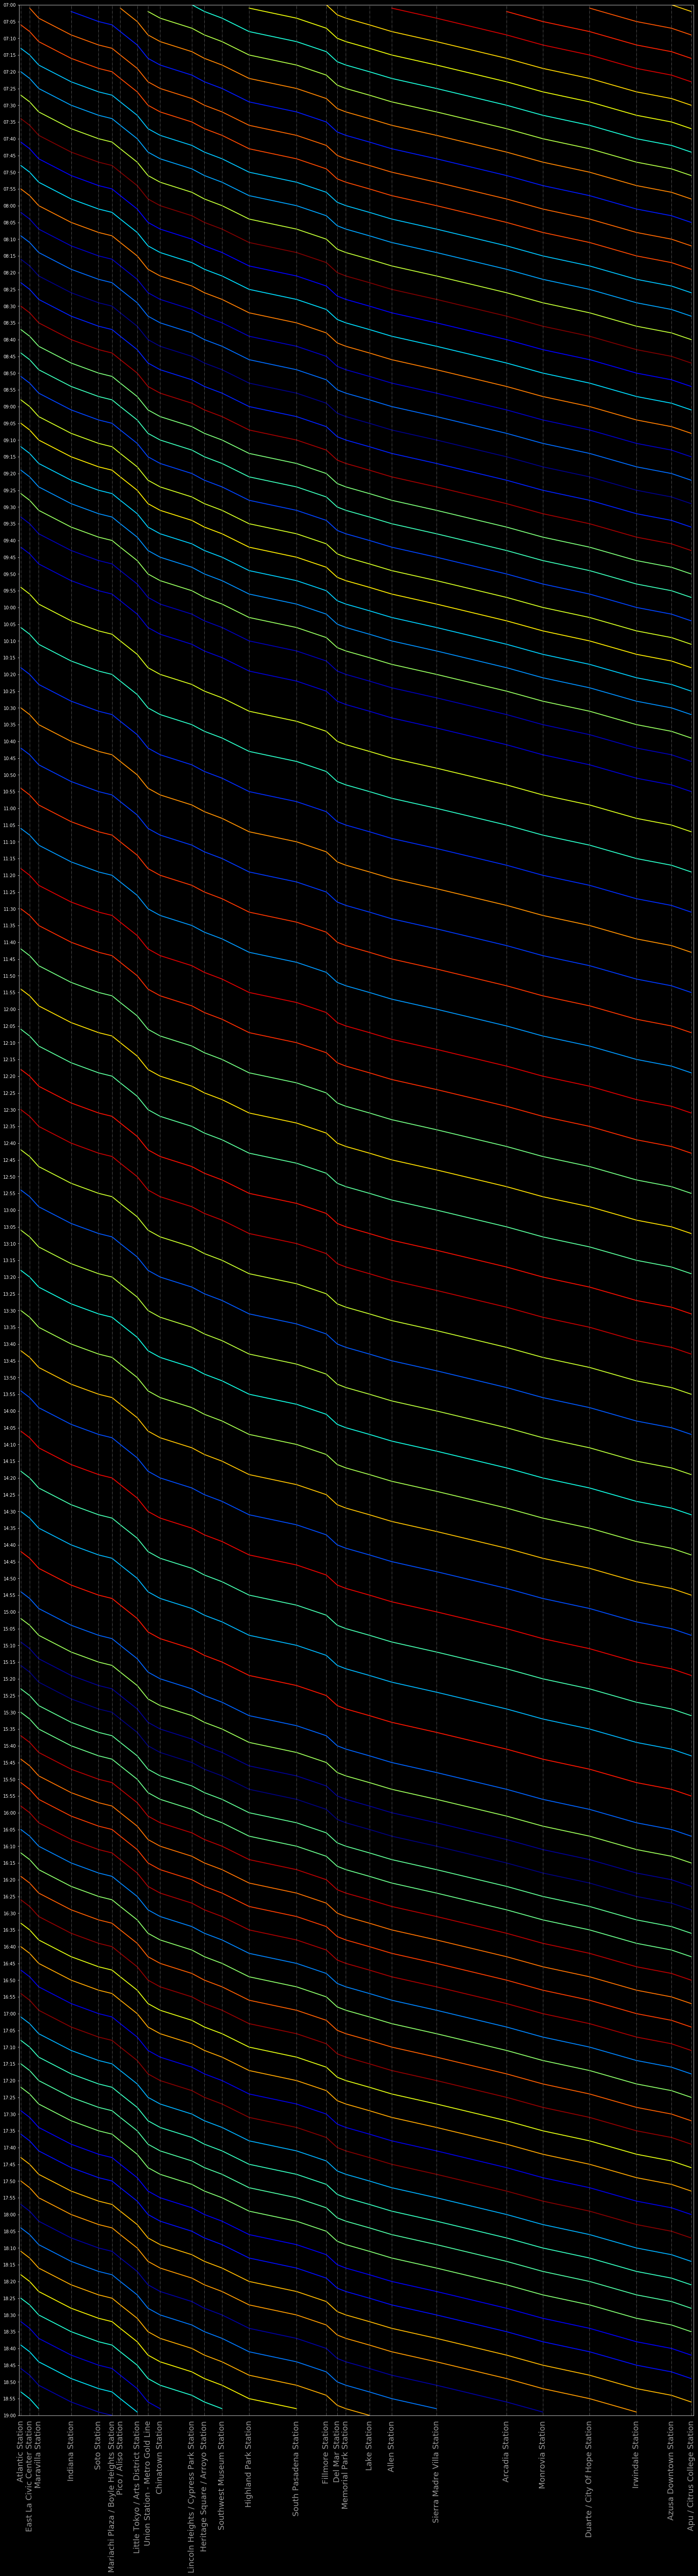

In [13]:
northPlot.plot()

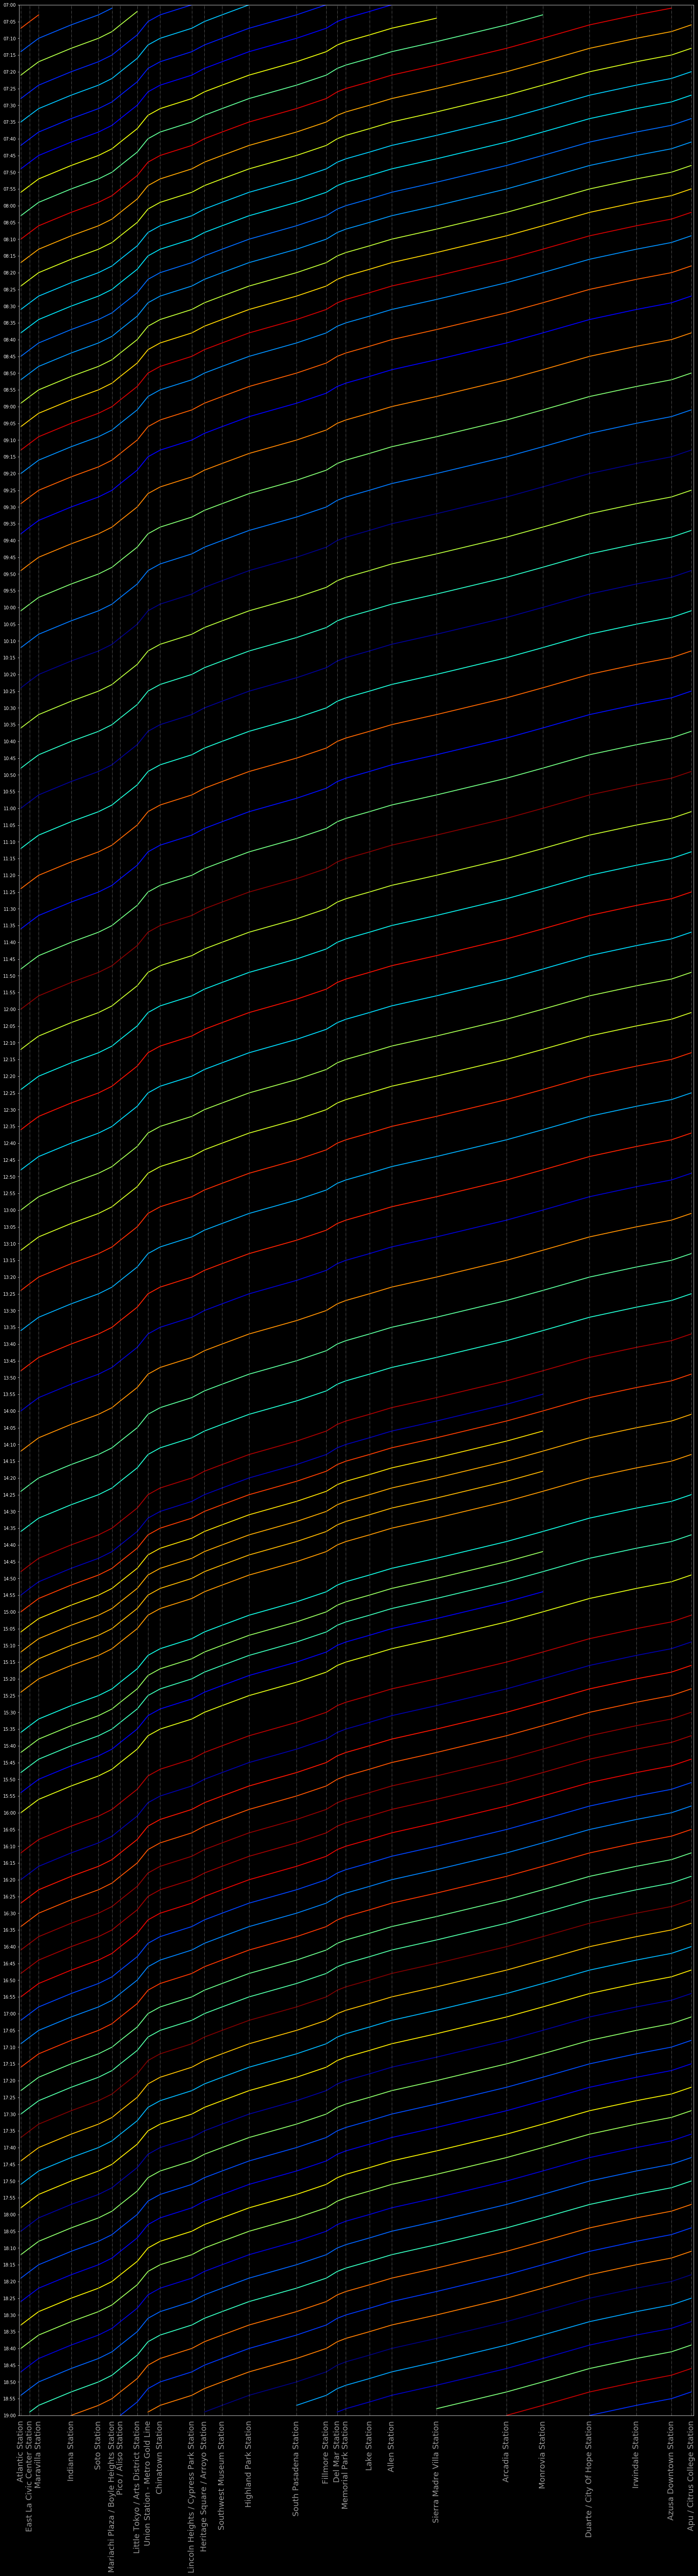

In [14]:
southPlot.plot()